In [26]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt

from src.dataset import *
from src.lp import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [175]:
def plot_consumption(size=24*7):
    plt.plot(lp.P[:size], label="real")
    plt.plot(np.sum(result.consumption[:, :size], axis=0), label="LP")
    plt.plot([sum(lp.p_max)] * size, label="p_max")
    plt.legend()

def plot_load(size=24*7):
    for n in range(result.load.shape[0]):
        data = result.load[n, :size]
        plt.plot(range(size), data, label="PEM" if n < PEM_amount else "AWE")
    plt.legend()

In [176]:
dataset = Dataset.load("../data/Timeseries_33.153_-100.213_E5_200000kWp_crystSi_14_33deg_-3deg_2013_2023.csv")

In [190]:
PEM_amount = 1
AWE_amount = 10
lp = LP(dataset.data_power[:365*24], PEM_amount, AWE_amount, 3000)
lp.solve()
result = lp.get_result()

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (linux64 - ArcoLinux)

CPU model: AMD Ryzen 7 4700U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 96360 rows, 306600 columns and 367890 nonzeros
Model fingerprint: 0x5112c207
Model has 201480 general constraints
Variable types: 210240 continuous, 96360 integer (96360 binary)
Coefficient statistics:
  Matrix range     [5e-01, 2e+07]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+04, 2e+08]
  GenCon rhs range [3e-01, 5e-01]
  GenCon coe range [1e+00, 1e+00]
Presolve added 141354 rows and 0 columns
Presolve removed 0 rows and 65135 columns
Presolve time: 0.73s
Presolved: 237714 rows, 241465 columns, 550808 nonzeros
Variable types: 50233 continuous, 191232 integer (191230 binary)
Found heuristic solution: objective 2.488636e+09

Root relaxation: objective 2.047676e+09, 79 iterations, 0.00 seco

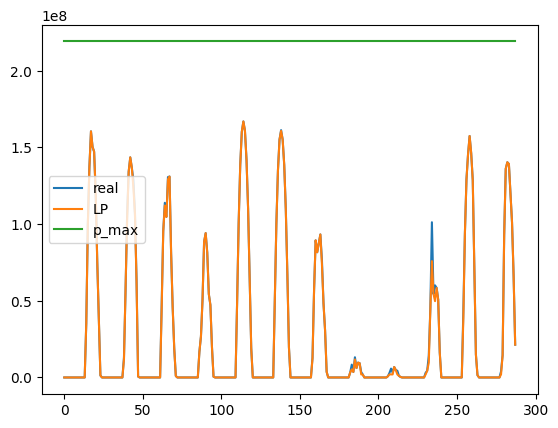

In [197]:
plot_consumption(24*12)

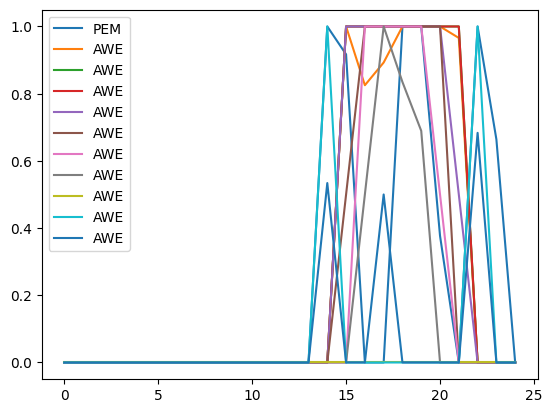

In [188]:
plot_load(25)